<a href="https://colab.research.google.com/github/adihari2001/smartknower-miniproj/blob/master/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.datasets import load_diabetes

In [4]:
diab=load_diabetes()

In [5]:
diab

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [6]:
print(diab.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [7]:
df = pd.DataFrame(diab.data)
df.columns = diab.feature_names
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


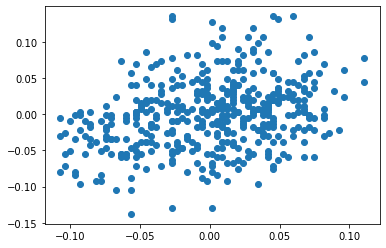

In [8]:
#VVVP:Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['s6'])
plt.show()

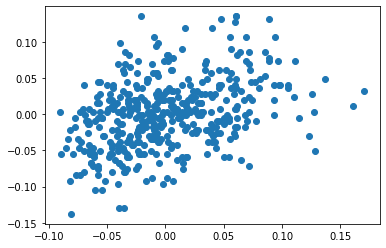

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['bmi'],df['s6'])
plt.show()

In [10]:
df['prog'] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


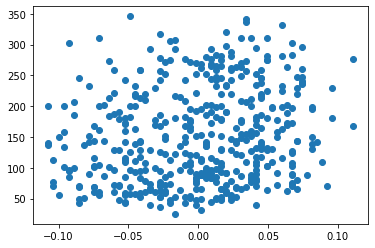

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['prog'])
plt.show()

In [12]:
x = df.iloc[:,0:10].values
y = df.iloc[:,10].values

In [13]:
x.ndim

2

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 10)

In [39]:
x_test.shape

(45, 10)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) # Take only training data
y_pred = model.predict(x_test)
y_pred # Predicted Output

array([149.35100539, 209.91624155, 187.12575388,  79.16874771,
       162.07127868, 122.80679628, 125.56908938, 262.27477976,
        80.00579279,  76.52866706, 124.60182964, 141.61952247,
       165.10932356,  96.3623371 ,  46.26503807, 222.23056309,
       143.38167308, 110.41208175, 202.75049356,  75.95754599,
       190.23895721, 243.51024723,  73.62491037, 212.75719947,
        53.38269079, 158.53939513, 156.58521006, 155.40175014,
       167.69550028, 105.3070848 , 275.05236897, 179.16180097,
        61.05396461, 156.89605421, 219.34237194, 181.01699852,
        67.78039153, 184.96304809, 279.8800014 , 195.25705656,
       201.77350888, 145.11018447, 216.56618149, 122.36921779,
        77.72513395])

In [41]:
y_test

array([200., 202.,  67.,  80., 151., 145.,  65., 308.,  42.,  92., 150.,
       202., 184., 101.,  47., 237.,  88., 152., 109.,  89., 163., 274.,
       138., 275.,  63., 154., 131.,  91., 128., 129., 243., 200.,  72.,
       185., 296., 144.,  75., 175., 281., 292., 292., 214., 275.,  92.,
        65.])

In [42]:
#mean squared error
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

2155.964651031972

In [43]:
#accuracy score
metrics.r2_score(y_test,y_pred)

0.6429875853302409

In [44]:
#root mean squared log error
from sklearn.metrics import mean_squared_error
rmsle = np.sqrt(mean_squared_error(np.log1p(y_test),np.log1p(y_pred)))
rmsle

0.32464176719959326

In [45]:
#root mean squared error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error((y_test),(y_pred)))
rmse

46.432366416455366